# Desafio Python para Dados

Este exercício tem como objetivo avaliar sua familiaridade com o uso de Python para análise de dados, incluindo leitura de arquivos CSV, inspeção inicial do dataset e criação de um gráfico simples.

## 📄 Tarefa

Você irá trabalhar com um conjunto de dados contendo a cotação do dólar em 2023, fornecido pelo Banco Central do Brasil.

In [1]:
#Importação de bibliotecas
import pandas as pd

In [2]:
#Leitura dos dados
df_dolar_2023 = pd.read_csv('https://raw.githubusercontent.com/programacaodinamica/dicas-pandas/refs/heads/master/dados/bcdata-dolar-2023.csv', sep=';', decimal=',')

In [3]:
#Conversão de tipo da coluna data
df_dolar_2023['data'] = pd.to_datetime(df_dolar_2023['data'], format='%d/%m/%Y')
df_dolar_2023.set_index('data', inplace=True)

In [ ]:
#Visualize as primeiras linhas do conjunto de dados

##Insira seu código aqui
df_dolar_2023.head(10)

,valor
data,
2023-01-02,5.3430
2023-01-03,5.3753
2023-01-04,5.4453
2023-01-05,5.4020
2023-01-06,5.2849
2023-01-09,5.2961
2023-01-10,5.2389
2023-01-11,5.2014
2023-01-12,5.1394


Agora, escreva um breve comentário sobre o que você observa nesse recorte inicial dos dados (valores, estrutura, possíveis insights ou dúvidas).

Consigo observar a variação da moeda diariamente, já consigo perceber que a partir do dia 9 de janeiro a moeda vai diminuindo, mas ainda tenho que verificar por quanto tempo isso ocorre.

In [ ]:
#Visualize os detalhes sobre os tipos de colunas no conjunto de dados

##Insira seu código aqui
df_dolar_2023.columns
print(df_dolar_2023.index.dtype)

datetime64[ns]


In [ ]:
print(df_dolar_2023['valor'].dtype)

float64


In [ ]:
# descrição estatística do dataframe
df_dolar_2023.describe()

,valor
count,249.000000
mean,4.994748
std,0.148686
min,4.719600
25%,4.884900
50%,4.967200
75%,5.095300
max,5.445300


In [ ]:
df_dolar_2023.T

data,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
valor,5.343,5.3753,5.4453,5.402,5.2849,5.2961,5.2389,5.2014,5.1394,5.114,...,4.9391,4.9393,4.8657,4.876,4.8749,4.8613,4.8362,4.83,4.8407,4.8407


In [ ]:
# criar series por MÊS
# criar visualizacao por semestre - talvez

In [4]:
# criando series para separar os valores por mês e facilitar na visualização dos dados e criação de gráfico posteriorimente
## usando `.resample()` que facilita o agrupamento automático por data
dolar_mensal = df_dolar_2023['valor'].resample('M').mean()

/tmp/ipython-input-1020902892.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dolar_mensal = df_dolar_2023['valor'].resample('M').mean()


In [ ]:
# visualizando a series 'dolar_mensal'
## usando o resample ele já agrupa com a média
print(dolar_mensal)

data
2023-01-31    5.200082
2023-02-28    5.171089
2023-03-31    5.210861
2023-04-30    5.019133
2023-05-31    4.982241
2023-06-30    4.850967
2023-07-31    4.800233
2023-08-31    4.902943
2023-09-30    4.936390
2023-10-31    5.064243
2023-11-30    4.897735
2023-12-31    4.896640
Freq: ME, Name: valor, dtype: float64


## **CRIAÇÃO E CUSTOMIZAÇÃO DE GRÁFICOS DA EVOLUÇÃO MENSAL E SEMESTRAL**

In [13]:
import matplotlib.pyplot as plt

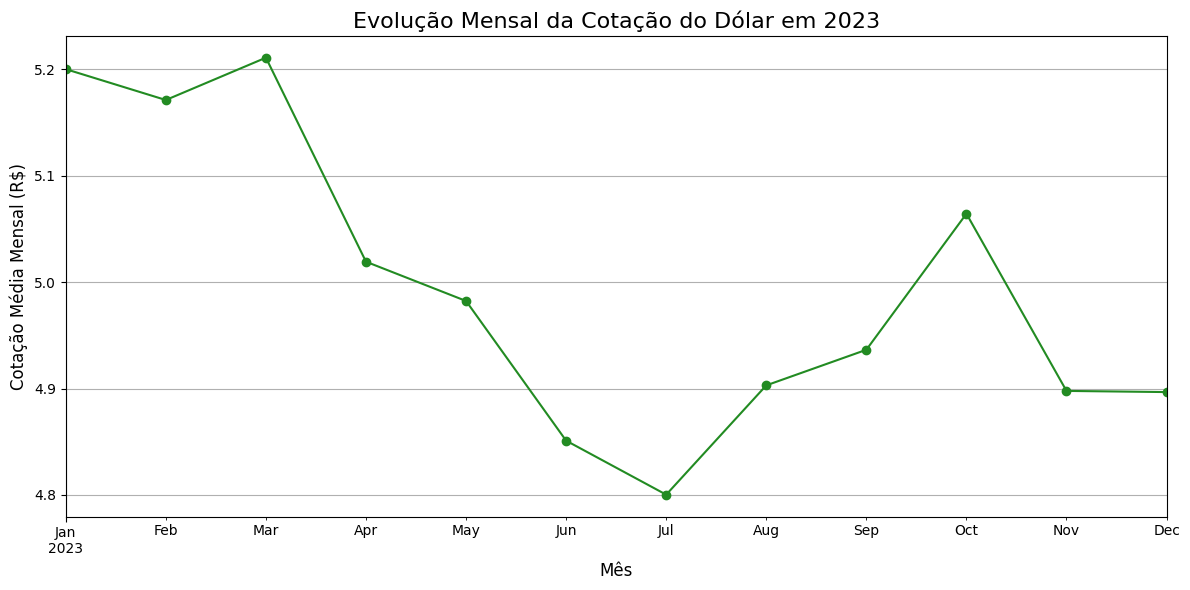

In [14]:
#Implemente um gráfico da evolução mensal do dólar em 2023
#Para um gráfico mais legível modifique o tamanho da figura
#Opcional: Você também pode modificar a cor padrão do gráfico

##Insira seu código aqui

# Definir o tamanho da figura do gráfico para melhor legibilidade (largura=12, altura=6)
plt.figure(figsize=(12, 6))

# Plotar o gráfico de linhas com os dados mensais
dolar_mensal.plot(
    kind='line',
    color='forestgreen',
    marker='o',
    linestyle='-'
)

# Adicionar um título ao gráfico
plt.title('Evolução Mensal da Cotação do Dólar em 2023', fontsize=16)

# Adicionar rótulos aos eixos X e Y
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Cotação Média Mensal (R$)', fontsize=12)

# Adicionar uma grade para facilitar a visualização dos valores
plt.grid(True)

# Garantir que o layout fique bem ajustado
plt.tight_layout()

# Exibir o gráfico gerado
plt.show()

In [5]:
# visualização por semestre
primeiro_semestre_df = df_dolar_2023.loc[df_dolar_2023.index.month <= 6]
segundo_semestre_df = df_dolar_2023.loc[df_dolar_2023.index.month > 6]
print(primeiro_semestre_df)

             valor
data              
2023-01-02  5.3430
2023-01-03  5.3753
2023-01-04  5.4453
2023-01-05  5.4020
2023-01-06  5.2849
...            ...
2023-06-26  4.7692
2023-06-27  4.7897
2023-06-28  4.8557
2023-06-29  4.8578
2023-06-30  4.8186

[124 rows x 1 columns]


In [6]:
# media de cada semestre
media_primeiroSemestre = primeiro_semestre_df['valor'].mean()
media_segundoSemestre = segundo_semestre_df['valor'].mean()
print(media_primeiroSemestre)
print(media_segundoSemestre)

5.073832258064516
4.916295999999999


In [7]:
variacao_percentual = ((media_segundoSemestre - media_primeiroSemestre) / media_primeiroSemestre) * 100
print(variacao_percentual)

-3.104877143191391


In [8]:
print("--- Análise Semestral da Cotação do Dólar em 2023 ---")
print(f"Média do 1º Semestre: R$ {media_primeiroSemestre:.4f}")
print(f"Média do 2º Semestre: R$ {media_segundoSemestre:.4f}")
print(f"Variação Percentual do 1º para o 2º Semestre: {variacao_percentual:.2f}%")

--- Análise Semestral da Cotação do Dólar em 2023 ---
Média do 1º Semestre: R$ 5.0738
Média do 2º Semestre: R$ 4.9163
Variação Percentual do 1º para o 2º Semestre: -3.10%


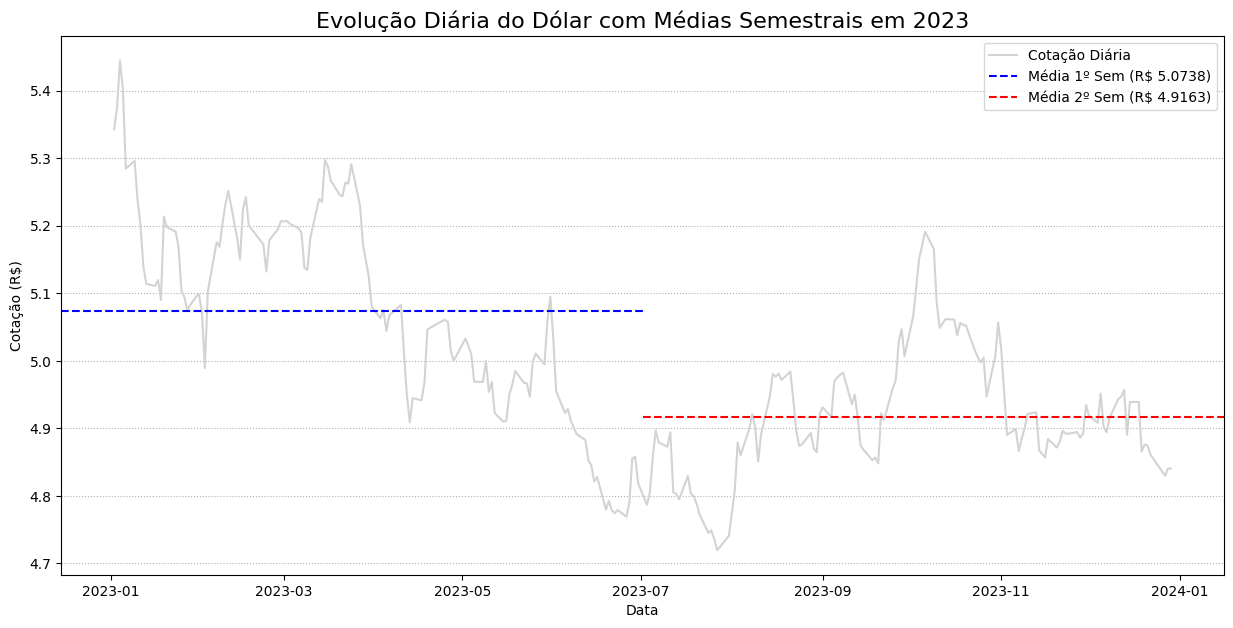

In [ ]:
# --- GRÁFICO: EVOLUÇÃO DIÁRIA COM MÉDIAS SEMESTRAIS ---

plt.figure(figsize=(15, 7))

plt.plot(df_dolar_2023.index, df_dolar_2023['valor'], color='lightgray', label='Cotação Diária')

# linha da média do 1º semestre
plt.axhline(y=media_primeiroSemestre, color='b', linestyle='--',
            xmin=0, xmax=0.5,
            label=f'Média 1º Sem (R$ {media_primeiroSemestre:.4f})')

# linha da média do 2º semestre
plt.axhline(y=media_segundoSemestre, color='r', linestyle='--',
            xmin=0.5, xmax=1,
            label=f'Média 2º Sem (R$ {media_segundoSemestre:.4f})')


plt.title('Evolução Diária do Dólar com Médias Semestrais em 2023', fontsize=16)
plt.ylabel('Cotação (R$)')
plt.xlabel('Data')
plt.legend()
plt.grid(True, axis='y', linestyle=':')
plt.show()

Escreva um breve comentário sobre o que você observa no gráfico (possíveis insights ou dúvidas).

Para compreender a dinâmica do dólar em 2023, realizei uma análise sobre sua cotação diária, com *agrupamentos mensais e semestrais* para identificar as principais tendências. A análise semestral, em particular, oferece uma visão macro da trajetória da moeda e serve como base para futuras comparações anuais.

A conclusão central de 2023 é uma *tendência de valorização do Real*, com a cotação média do dólar caindo de `R$ 5,07`  no primeiro semestre para `R$ 4,92` no segundo, uma redução de 3,10%.

Contudo, essa tendência de queda ocorreu em meio a um cenário de *alta volatilidade*. A cotação média mensal atingiu seu pico em Março (`R$ 5,21`) e seu vale em Julho (`R$ 4,80`). Essa flutuação de quase **9%** reflete um verdadeiro "cabo de guerra" entre forças econômicas opostas:

 - De um lado, fatores de *pressão alta* sobre o dólar, como as incertezas em torno da nova política fiscal do governo brasileiro e um cenário internacional adverso, com a alta de juros nos EUA e tensões geopolíticas.

 - Do outro lado, o principal fator de *pressão baixa*: a altíssima Taxa Selic no Brasil, que atraiu um forte fluxo de capital estrangeiro e aumentou a oferta de dólares no país.


***Logo, podemos extrair alguns insights:***

 - Apesar dos fatores de instabilidade que tradicionalmente fortalecem o dólar, a moeda tenha se desvalorizado no Brasil. Isso sugere que a atratividade dos juros brasileiros superou a percepção de risco durante grande parte do ano.

 - O verdadeiro ponto de inflexão da cotação ocorreu em julho, quando o dólar atingiu sua média mínima anual. O mercado, em forte expectativa pelo iminente corte de juros, começou a antecipar o movimento, e a moeda voltou a subir já no final daquele mês. A decisão oficial do Banco Central de reduzir a Taxa Selic em 2 de agosto (a primeira queda em três anos!) veio para confirmar a nova tendência, consolidando o fim do ciclo de forte valorização do Real e indicando uma *possível* correlação entre a política monetária e o comportamento do câmbio.

Sendo assim, a trajetória do dólar em 2023 não pode ser atribuída a um único fator. Ela é o resultado de uma complexa interação de forças, onde a política de juros do Banco Central se mostrou um pilar fundamental para a *valorização da moeda brasileira*, mesmo diante de um ambiente de significativas incertezas internas e externas.

***Sobre o Desafio:***

A condução deste desafio foi uma experiência muito gratificante. Tenho grande apreço por projetos práticos e me envolvo profundamente no processo. Mesmo com familiaridade limitada sobre o mercado financeiro, a necessidade de pesquisar o tema para contextualizar a análise se revelou uma jornada de aprendizado estimulante e proveitosa.
O principal desafio encontrado foi, de fato, a imersão em uma área que não tenho muito conhecimento, o que exigiu uma pesquisa aprofundada para extrair insights que fossem além da observação superficial. Como próximos passos, planejo revisitar e expandir este projeto, incluindo a análise de dados do ano seguinte para comparações e a implementação de uma correlação direta com os dados históricos da Taxa Selic, mencionada em minha análise.

In [9]:
#Por fim, exporte o dataframe como um arquivo .csv

##Insira seu código aqui
output_path_custom = 'stella_fernandes_dolar2023.csv'
df_dolar_2023.to_csv(output_path_custom, index=True, sep=';', decimal=',')

In [10]:
#criando dataframe da Series 'dolar_mensal'
df_media_mensal = dolar_mensal.to_frame(name='media_cotacao_dolar')
df_media_mensal.index.name = 'mes'
# salvando em csv
output_path_mensal = 'dolar_medias_mensais_2023.csv'
df_media_mensal.to_csv(output_path_mensal, index=True)


## Materiais de apoio

### **Referências Bibliográficas**

**Fontes Oficiais (Banco Central do Brasil)**

BANCO CENTRAL DO BRASIL. Histórico de taxas de juros básicas. BCB. Disponível em: https://www.bcb.gov.br/controleinflacao/historicotaxasjuros. Acesso em: 11 ago. 2025.

BANCO CENTRAL DO BRASIL. Atas do Copom. BCB. Disponível em: https://www.bcb.gov.br/publicacoes/atascopom/cronologicos. Acesso em: 11 ago. 2025.

BANCO CENTRAL DO BRASIL. Ata da 256ª Reunião do Comitê de Política Monetária (Copom). Publicada em 08 de agosto de 2023. Disponível em: https://www.bcb.gov.br/publicacoes/atascopom/02082023. Acesso em: 11 ago. 2025.


**Artigos e Análises (Mídia e Mercado)**

G1. Copom corta taxa básica de juros; Selic cai de 13,75% para 13,25%. Publicado em 02 de agosto de 2023. Disponível em: https://g1.globo.com/economia/noticia/2023/08/02/copom-corta-taxa-basica-de-juros-selic-cai-de-1375percent-para-1325percent.ghtml. Acesso em: 11 ago. 2025.


PODER360. BC corta Selic mais uma vez e juro base termina ano em 11,75%. Publicado em 13 de dezembro de 2023. Disponível em: https://www.poder360.com.br/economia/bc-corta-selic-mais-uma-vez-e-juro-base-termina-ano-em-1175/. Acesso em: 11 ago. 2025.


BRASILPREV. Retrospectiva econômica 2023 e perspectivas para 2024. Blog Brasilprev. Disponível em: https://blog.brasilprev.com.br/retrospectiva-economica-2023. Acesso em: 11 ago. 2025.
